In [1]:
import pandas as pd
import seaborn
from sklearn.preprocessing import *
from matplotlib import pyplot as plt
import numpy as np
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from collections import Counter
from sklearn.ensemble import RandomForestRegressor

#print(pd.__version__)

In [2]:
data = pd.read_csv("data/Automobile_data.csv")
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [5]:
data.duplicated().sum()

0

In [6]:
data[data["normalized-losses"] == "?"]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?
14,1,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


In [7]:
data = data.replace('?', None)
data[:10]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,None,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,None,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,None,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,None,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,None,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,None,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,None


In [8]:
data.isnull().sum()


symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [9]:
def related_mean(data, column, related):
    
    related_mean_values = dict()
    for index, row in data.iterrows():
        if row[column] is None:
            continue
        
        if row[related] not in related_mean_values:
            related_mean_values[row[related]] = []
        
        related_mean_values[row[related]].append(float(row[column]))
    
    for related in related_mean_values.keys():
        related_mean_values[related] = np.mean(related_mean_values[related])
    
    return related_mean_values

losses_mean = related_mean(data, 'normalized-losses', 'symboling')
losses_mean


{2: 125.6896551724138,
 1: 128.5744680851064,
 0: 113.16666666666667,
 -1: 85.6,
 3: 168.64705882352942,
 -2: 103.0}

In [10]:

def value_replacement(df, none_to_replace, ref_column, mean_data, default_value=None):
    
    for index, row in df.iterrows():
        
        if row[none_to_replace] is None:
            
            key = df[ref_column][index]
            if key in mean_data.keys():
                df[none_to_replace][index] = mean_data[key]
                continue
            df[none_to_replace][index] = default_value

value_replacement(data, 'normalized-losses', 'symboling', losses_mean, np.mean(list(losses_mean.values())).round(1))
display(data)

C:\Users\acer\AppData\Local\Temp\ipykernel_8952\3700487219.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[none_to_replace][index] = mean_data[key]


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,168.647059,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168.647059,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,128.574468,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [11]:
price_mean = related_mean(data, 'price', 'horsepower')

value_replacement(data, 'price', 'horsepower', price_mean, np.mean(list(price_mean.values())).round(0))
display(data[data['price'] == np.mean(list(price_mean.values())).round(0)])


C:\Users\acer\AppData\Local\Temp\ipykernel_8952\3700487219.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[none_to_replace][index] = mean_data[key]
C:\Users\acer\AppData\Local\Temp\ipykernel_8952\3700487219.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[none_to_replace][index] = default_value


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
129,1,128.574468,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,15390.0


In [12]:
horsepower_mean = related_mean(data, 'horsepower', 'engine-size')
value_replacement(data, 'horsepower', 'engine-size', horsepower_mean, np.mean(list(horsepower_mean.values())).round(0))

stroke_mean = related_mean(data, 'stroke', 'horsepower')
value_replacement(data, 'stroke', 'horsepower', stroke_mean, np.mean(list(stroke_mean.values())).round(2))

bore_mean = related_mean(data, 'bore', 'horsepower')
value_replacement(data, 'bore', 'horsepower', bore_mean, np.mean(list(bore_mean.values())).round(2))

peak_rpm_mean = related_mean(data, 'peak-rpm', 'horsepower')
value_replacement(data, 'peak-rpm', 'horsepower', peak_rpm_mean, np.mean(list(peak_rpm_mean.values())).round(0))


C:\Users\acer\AppData\Local\Temp\ipykernel_8952\3700487219.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[none_to_replace][index] = default_value
C:\Users\acer\AppData\Local\Temp\ipykernel_8952\3700487219.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[none_to_replace][index] = mean_data[key]


In [13]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [14]:
def find_related(df, column, related):
    related_values = {}
    
    for index, row in df.iterrows():
        
        if row[column] is None:
            continue
        if row[related] not in related_values:
            related_values[row[related]] = []
        
        related_values[row[related]].append(row[column])
    
    for related in related_values.keys():
        related_values[related] = dict(Counter(related_values[related]))
        #display(related_values[related])

    for key, value in related_values.items():
        related_values[key] = list(related_values[key].keys())[0]

    return related_values

num_of_doors_mean = find_related(data, 'num-of-doors', 'body-style')
display(num_of_doors_mean)

value_replacement(data, 'num-of-doors', 'body-style', num_of_doors_mean)

{'convertible': 'two',
 'hatchback': 'two',
 'sedan': 'four',
 'wagon': 'four',
 'hardtop': 'two'}

C:\Users\acer\AppData\Local\Temp\ipykernel_8952\3700487219.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[none_to_replace][index] = mean_data[key]


In [15]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [16]:

transformed_data = data
transformed_data['symboling'] = MinMaxScaler().fit_transform(transformed_data['symboling'].values.reshape((-1, 1)))
transformed_data['normalized-losses'] = transformed_data['normalized-losses'].apply(lambda x: float(x))
transformed_data['make'] = LabelEncoder().fit_transform(transformed_data['make'].values)
transformed_data['fuel-type'] = LabelEncoder().fit_transform(transformed_data['fuel-type'].values)
transformed_data['aspiration'] = LabelEncoder().fit_transform(transformed_data['aspiration'].values)
transformed_data['num-of-doors'] = LabelEncoder().fit_transform(transformed_data['num-of-doors'].values)
transformed_data['body-style'] = LabelEncoder().fit_transform(transformed_data['body-style'].values)
transformed_data['drive-wheels'] = LabelEncoder().fit_transform(transformed_data['drive-wheels'].values)
transformed_data['engine-location'] = LabelEncoder().fit_transform(transformed_data['engine-location'].values)
transformed_data['engine-type'] = LabelEncoder().fit_transform(transformed_data['engine-type'].values)
transformed_data['fuel-system'] = LabelEncoder().fit_transform(transformed_data['fuel-system'].values)
transformed_data['num-of-cylinders'] = LabelEncoder().fit_transform(transformed_data['num-of-cylinders'].values)
transformed_data['price'] = transformed_data['price'].apply(lambda x: float(x))

display(transformed_data)




,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.0,168.647059,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1.0,168.647059,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,0.6,128.574468,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,0.8,164.000000,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.4,10.0,102,5500,24,30,13950.0
4,0.8,164.000000,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.4,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,95.000000,21,1,0,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,0.2,95.000000,21,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,0.2,95.000000,21,1,0,0,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,0.2,95.000000,21,0,1,0,3,2,0,109.1,...,145,3,3.01,3.4,23.0,106,4800,26,27,22470.0


In [17]:
selection = VarianceThreshold(threshold=(0.5))

data_without_price = transformed_data.drop(["price"], axis=1)
selection.fit(data_without_price, transformed_data["price"])

selected_data = selection.transform(data_without_price)

selected_features = selection.get_feature_names_out(data_without_price.columns[:])
selected_data = pd.DataFrame(selected_data, columns=selected_features)


#display(pd.DataFrame(selected_features))
display(selected_data)


,normalized-losses,make,body-style,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,168.647059,0,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,9.0,111,5000,21,27
1,168.647059,0,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,9.0,111,5000,21,27
2,128.574468,0,2,94.5,171.2,65.5,52.4,2823,5,3,152,5,9.0,154,5000,19,26
3,164.0,1,3,99.8,176.6,66.2,54.3,2337,3,2,109,5,10.0,102,5500,24,30
4,164.0,1,3,99.4,176.6,66.4,54.3,2824,3,1,136,5,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,21,3,109.1,188.8,68.9,55.5,2952,3,2,141,5,9.5,114,5400,23,28
201,95.0,21,3,109.1,188.8,68.8,55.5,3049,3,2,141,5,8.7,160,5300,19,25
202,95.0,21,3,109.1,188.8,68.9,55.5,3012,5,3,173,5,8.8,134,5500,18,23
203,95.0,21,3,109.1,188.8,68.9,55.5,3217,3,3,145,3,23.0,106,4800,26,27


In [18]:
deleted_features = []
for feature in data_without_price.columns[:]:
    if feature not in selected_features:
        deleted_features.append(feature)

deleted_features

['symboling',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'drive-wheels',
 'engine-location',
 'bore',
 'stroke']

In [19]:
tree_classifier = RandomForestRegressor(n_estimators=100)
tree_classifier.fit(data_without_price, transformed_data["price"])
model = SelectFromModel(tree_classifier, prefit=True)
forest_selected_data = model.transform(data_without_price)

display(forest_selected_data[:20])

C:\Users\acer\anaconda3\envs\dsml\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


array([[2548, 130, 27],
       [2548, 130, 27],
       [2823, 152, 26],
       [2337, 109, 30],
       [2824, 136, 22],
       [2507, 136, 25],
       [2844, 136, 25],
       [2954, 136, 25],
       [3086, 131, 20],
       [3053, 131, 22],
       [2395, 108, 29],
       [2395, 108, 29],
       [2710, 164, 28],
       [2765, 164, 28],
       [3055, 164, 25],
       [3230, 209, 22],
       [3380, 209, 22],
       [3505, 209, 20],
       [1488, 61, 53],
       [1874, 90, 43]], dtype=object)

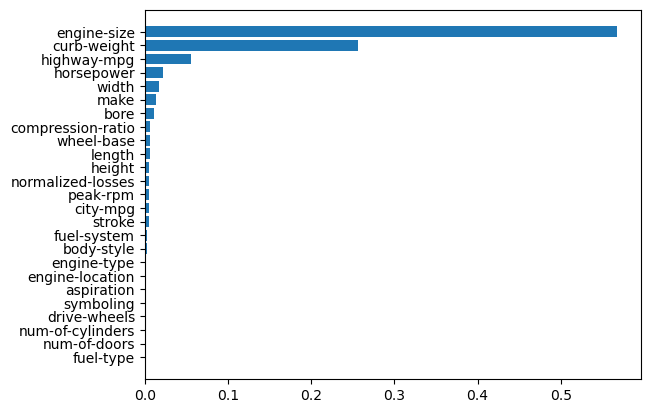

In [20]:
feature_importances = tree_classifier.feature_importances_
indices = np.argsort(feature_importances)
plt.yticks(range(len(indices)), np.array(data_without_price.columns)[indices])
plt.barh(range(len(indices)), feature_importances[indices])
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_8952\3578001943.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


<AxesSubplot:>

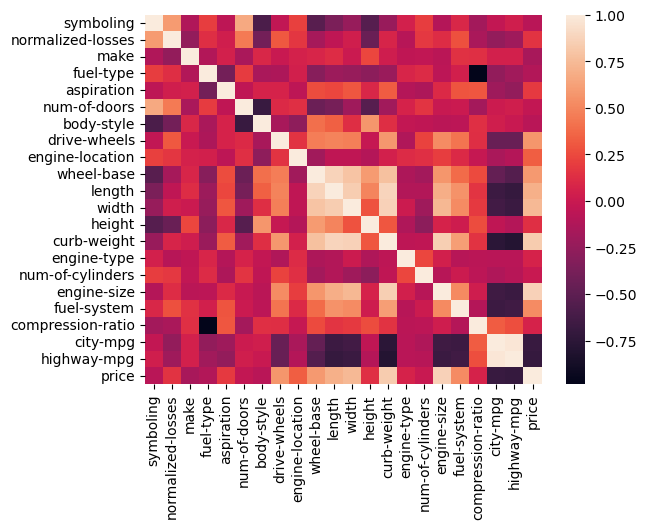

In [21]:
correlation = data.corr()
#display(correlation)
seaborn.heatmap(correlation)